# MEA stimulation

This notebook shows how to simulate the electric potential generated by electrode currents using a MEA object.

In [9]:
import MEAutility as MEA
import matplotlib.pylab as plt
import numpy as np

First, let's instantiate a MEA object among the available MEA models:

In [3]:
MEA.return_mea()

Available MEA: 
 ['SqMEA-6-25um', 'SqMEA-10-15um', 'circle_500', 'tetrode', 'Neuroseeker-128', 'SqMEA-5-30um', 'SqMEA-15-10um', 'Neuronexus-32-Kampff', 'Neuronexus-32-cut-30', 'Neuropixels-128', 'Neuroseeker-128-Kampff', 'Neuropixels-24', 'SqMEA-7-20um', 'Neuronexus-32', 'Neuropixels-384']


In [4]:
sqmea = MEA.return_mea('SqMEA-10-15um')

'plane' field with 2D dimensions assumed to be 'yz
Model is set to semi


By default, the stimulation `model` is set to `semi`. This is the default for MEA objects of type `mea` and it models that currents radiate only on one side of the probe (the MEA is considered as an infinite insulating plane). In this case the electric potential at point $\overrightarrow{r}$ generated by the electrode currents $I_i$ is (electrode positions are $\overrightarrow{r_i}$):

$$V(\overrightarrow{r}) = \sum_i \frac{I_i}{2\sigma\pi |\overrightarrow{r} - \overrightarrow{r_i}|}$$

where $\sigma$ is the tissue conductivity.

Instead, for mea type `wire`, the tissue is assumed to be infinite and homogeneous, that is the probe has no effect on the electric potential and currents radiate in all directions:

$$V(\overrightarrow{r}) = \sum_i \frac{I_i}{4\sigma\pi |\overrightarrow{r} - \overrightarrow{r_i}|}$$

## Conventions

- currents are in $nA$
- distances and positions are in $\mu m$
- electric potentials are in $mV$

## Handling currents 

MEA currents can be easily accessed and changed in various ways:

In [7]:
# check currents
print(sqmea.currents)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# set currents with an array (or list)
curr = np.arange(sqmea.number_electrodes)
sqmea.currents = curr
print(sqmea.currents)

curr = list(curr)
sqmea.currents = curr
print(sqmea.currents)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


In [18]:
# reset currents to 0
sqmea.reset_currents()
print(sqmea.currents)

# reset currents to 100
sqmea.reset_currents(100)
print(sqmea.currents)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100.]


[ 981.82745638 1009.4225328   980.59446288 1021.84074601 1018.1572562
  918.58865213 1008.04505657  999.36547316  927.46403924 1065.63963816
 1080.36108299  997.48512325  955.77368729  968.63590506 1070.42454515
 1085.46921662  921.07704616  979.30205968 1012.34730331 1012.79496904
  963.83298457  988.32434287 1106.43046658  974.15445281  934.67835201
 1053.84116091 1031.04745316 1057.6322167  1021.16730171 1083.70992497
 1016.13854587 1019.56294745 1094.04393952 1016.23431238  969.54988089
  922.52057992 1059.11744587  899.85650184  916.79272101 1019.26351659
  989.02450145 1001.02299802 1042.12275782 1024.35691717  978.20260417
  970.95261352 1051.12290943  991.65966429 1086.33531816 1066.28466694
  997.3053655  1016.80403083  989.18265906  963.61358103 1010.86917237
 1001.11744667 1031.8501328  1019.95601932 1050.19459937 1089.44599242
  955.83415109  992.53532245  986.7300512   979.92576835 1012.59245418
 1008.92640184 1031.51889717 1056.68324627  951.89968318 1006.7265166
 1053.90

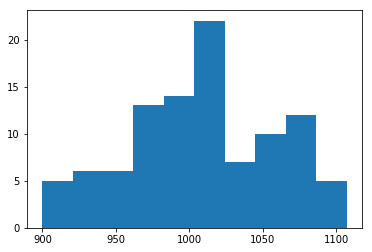

In [37]:
# random values with a certain amplitude and standard deviation
sqmea.set_random_currents(mean=1000, sd=50)
print(sqmea.currents)
_ = plt.hist(sqmea.currents)

For Rectangular MEAs, currents can be handled with matrices:

In [38]:
print(sqmea.get_current_matrix())
print('Shape: ', sqmea.get_current_matrix().shape)

[[ 981.82745638 1080.36108299  963.83298457 1016.13854587  989.02450145
   997.3053655   955.83415109 1053.90892515  996.18430577  994.68914775]
 [1009.4225328   997.48512325  988.32434287 1019.56294745 1001.02299802
  1016.80403083  992.53532245 1017.50055089 1029.40050513  920.5953848 ]
 [ 980.59446288  955.77368729 1106.43046658 1094.04393952 1042.12275782
   989.18265906  986.7300512   987.30193577 1106.92397123 1024.82353596]
 [1021.84074601  968.63590506  974.15445281 1016.23431238 1024.35691717
   963.61358103  979.92576835 1066.15120222 1018.1139235  1053.90422881]
 [1018.1572562  1070.42454515  934.67835201  969.54988089  978.20260417
  1010.86917237 1012.59245418 1065.14504014  951.25123753  966.47951974]
 [ 918.58865213 1085.46921662 1053.84116091  922.52057992  970.95261352
  1001.11744667 1008.92640184  950.75570045 1061.33988325 1079.17728054]
 [1008.04505657  921.07704616 1031.04745316 1059.11744587 1051.12290943
  1031.8501328  1031.51889717  905.17798602  915.28087796 

In [39]:
current_of_zeros = np.zeros((10,10))
print(current_of_zeros)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [40]:
sqmea.set_current_matrix(current_of_zeros)
sqmea.get_current_matrix()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Single currents can be set separately either by:

In [42]:
# set elecectrode 50 current to 10000
sqmea.set_current(50, 10000)
sqmea.currents

array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0., 10000.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.])

Or by using matrix notation for rectangular MEAs. This makes it easy, for example, to create multipolar current sets.

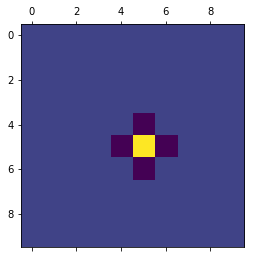

In [75]:
# reset elecectrode 50 current to 0
sqmea.set_current(50, 0)

# build a multipolar current set
sqmea[5][5].current = 8000
sqmea[6][5].current = -2000
sqmea[4][5].current = -2000
sqmea[5][6].current = -2000
sqmea[5][4].current = -2000

_ = plt.matshow(sqmea.get_current_matrix())

## Stimulation

Once currents are set, electric potentials can be computed with the `compute field` function.
Let's first create a bunch of 3d points, for example, on a straight line from close to the active electrode.

In [76]:
sqmea[5][5].position

array([0. , 7.5, 7.5])

In [77]:
npoints = 1000
x_vec = np.linspace(5, 100, npoints)
y_vec = [sqmea[5][5].position[1]] * npoints
z_vec = [sqmea[5][5].position[2]] * npoints

points = np.array([x_vec, y_vec, z_vec]).T
# points should be a np.array (or list) o npoints x 3
print(points.shape)

(1000, 3)


Now, we can compute the electric potential:

In [78]:
Vp = sqmea.compute_field(points)

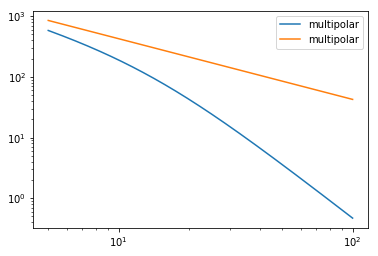

In [79]:
# multipolar currents
Vp = sqmea.compute_field(points)
_ = plt.loglog(x_vec, Vp, label='multipolar')

# monopolar currents
sqmea.reset_currents()
sqmea[5][5].current = 8000
Vp = sqmea.compute_field(points)
_ = plt.loglog(x_vec, Vp, label='multipolar')
_ = plt.legend()

The potential fall for the multipolar is faster than the monopolar configuration (which is linear in log scale)!

## Temporal dynamics